In [23]:
import math
import pandas as pd
import numpy as np
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models.ldamodel import LdaModel as Lda
from gensim import corpora
import string
import os
import codecs
import pandas as pd
import pyLDAvis.gensim
from operator import itemgetter

import textblob
from textblob import TextBlob

import sys

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tatyana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tatyana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')


In [ ]:
sia = SIA()
results = []

rawPostall = pd.read_csv("Bodies2.0.csv", names = ['text'])

rawPost = pd.DataFrame()
rawPost['text'] = rawPostall['text']


In [ ]:
for line in rawPost['text']:
    pol_score = sia.polarity_scores(line)
    pol_score['Text'] = line
    results.append(pol_score)


In [ ]:
df = pd.DataFrame.from_records(results)
# The number of words
df['Words count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df.head()

Dataframe consists of four columns from the sentiment scoring: Neu, Neg, Pos and compound. The first three represent the sentiment score percentage of each category in titles, and the compound single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

I will consider posts with a compound value greater than 0.2 as positive and less than -0.2 as negative. There's some testing and experimentation that goes with choosing these ranges, and there is a trade-off to be made here. If you choose a higher value, you might get more compact results (less false positives and false negatives), but the size of the results will decrease significantly.

I created a positive label of 1 if the compound is greater than 0.2, and a label of -1 if compound is less than -0.2. Everything else will be 0.

In [ ]:
df['Positive(1) or Negative(-1)'] = 0
df.loc[df['compound'] > 0.2, 'Positive(1) or Negative(-1)'] = 1
df.loc[df['compound'] < -0.2, 'Positive(1) or Negative(-1)'] = -1
df.head()

In [ ]:
df.to_csv("SentimentBodies.csv",index=False)

In [57]:
print("Positive text (30 items):\n")
print(list(df[df['label'] == 1].Text)[:30])

Positive titles (30 items):

['Best Websites to List a Business for Sale', 'Amazon sellers, what are Amazon fees when selling through them?', '5 steps to maximizing your odds of startup success', 'I need your recommendations... Pls help!', 'Does anyone have any experience with creating Udemy courses? Looking for advice', 'What is the best way to sell my local interest e-book?', 'My site is most likely going to be featured on a local news segment. How can I capitalize on this opportunity?', 'Useful tool to Marketers/ Developers/ Solopreneurs to make sure that the websites/ landing pages we share look good on social platforms.', 'My friend had some stickers made for our snowboards. Everyone on the mountain loves them and asks where to buy one...Best way to proceed?', 'Just got my GED! What’s the best job I can get for now, so I can move out and get on my own?', 'Best book about business model profitability assessment?', "What has been the most effective and/or creative way you've gotten 

In [58]:
print("\nNegative Text:\n")
print(list(df[df['label'] == -1].Text)[:30])


Negative Titles:

['Anyone doing Digital Marketing here? Want a no BS answer to some questions.', 'Why Drop Shipping and POD are doomed and what I’m doing about it.', 'I Feel Lost as an Entrepreneur', "I'm a part-time web designer making $1k a month from SEO. I want to grow but not sure it's in web design.", 'A short rant on Shopify Blog analytics (and its dashboard overall)', 'How Can I Own A Valid & Legal Paypal Account From Paypal Unsupported country?', 'Need some tips to solve the first big problem of this new project.', 'Why you will fail browsing this sub for the wrong reasons', 'Is this idea funny or terrible? Well I already made a website.. get your shit together box', 'I am in need of low cost influencer marketing tools.', 'How I struggled, failed, then learned how to code and now finally launch', '3 things I learnt from my failed restaurant+ advice needed on where to go next', 'What happens if I spend all this money and I get very little to no sales?', '"Not a total scam" ch

In [30]:
# how many total positives and negatives we have in this dataset:
# The first line gives us raw value counts of the labels, 
# whereas the second line provides percentages with the normalize keyword.
print("Raw value counts:")
print(df.label.value_counts())
print("")
print("Percentages (%):")
print(df.label.value_counts(normalize=True) * 100)

Raw value counts:
 0    44130
 1    27511
-1     6066
Name: label, dtype: int64

Percentages (%):
 0    56.790251
 1    35.403503
-1     7.806247
Name: label, dtype: float64


/home/tatyana/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


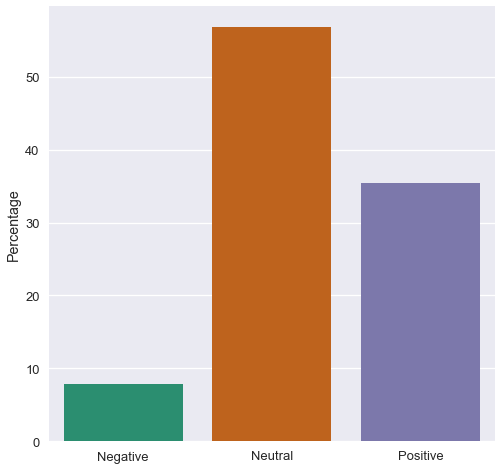

In [31]:
#Plot a bar char
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

The large number of neutral titles is due to 3 main reasons:
    The length of the titles is not enough to understand the sentiment.
    The assumption that I made earlier where titles with compound value between 0.2 and -0.2 are considered neutral. The higher the margin, the larger the number of neutral titles.
    I used general lexicon to categorize business titles. The more correct way is to use a business-specific lexicon, but for that we would either need a human to manually label data, or we would need to find a custom lexicon already made.